## <center>Visulazation on Student_mental_Health </center>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pymysql

In [2]:
db = pymysql.connect(
    host='localhost',
    user='root',
    password='BADass659#',
    database='students',
    cursorclass=pymysql.cursors.Cursor
)

cursor=db.cursor() 


In [8]:
query="""select * from student_mental_health"""
cursor.execute(query)
data=cursor.fetchall()
data
df=pd.DataFrame(data, columns=["Timestamp","Gender","Age","Course","Current_year","CGPA","Marital_status","Depression","Anxiety","Panic_attack","Sepacial_treatment"])
df


,Timestamp,Gender,Age,Course,Current_year,CGPA,Marital_status,Depression,Anxiety,Panic_attack,Sepacial_treatment
0,08-07-2020 12:02,Female,18,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,08-07-2020 12:04,Male,21,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,08-07-2020 12:05,Male,19,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,08-07-2020 12:06,Female,22,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,08-07-2020 12:13,Male,23,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...
95,13-07-2020 19:56,Female,21,BCS,year 1,3.50 - 4.00,No,No,Yes,No,No
96,13-07-2020 21:21,Male,18,Engineering,Year 2,3.00 - 3.49,No,Yes,Yes,No,No
97,13-07-2020 21:22,Female,19,Nursing,Year 3,3.50 - 4.00,Yes,Yes,No,Yes,No
98,13-07-2020 21:23,Female,23,Pendidikan Islam,year 4,3.50 - 4.00,No,No,No,No,No


### Total count of female and male

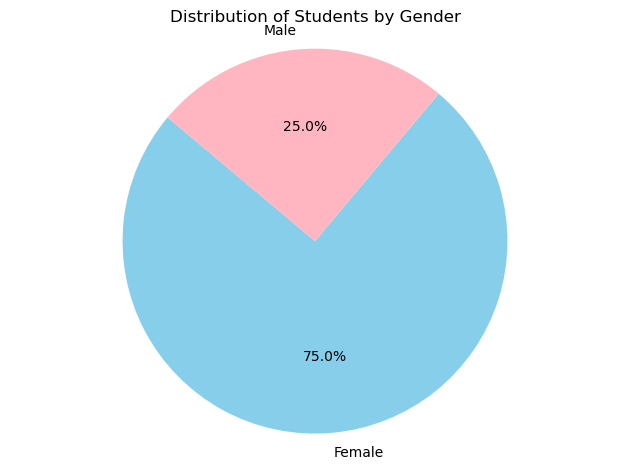

In [57]:
query="""select 
gender,
count(*) as total_students
from student_mental_health
group by gender;"""
cursor.execute(query)
data=cursor.fetchall()
data
# Assuming `data` looks like: [('Male', 60), ('Female', 80)]
# Split into labels and values
labels = [row[0] for row in data]
sizes = [row[1] for row in data]

# Plot pie chart
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightpink'])
plt.title('Distribution of Students by Gender')
plt.axis('equal')  # Equal aspect ratio ensures pie is a circle
plt.tight_layout()
plt.show()

### Depression Count by gender and Age

In [25]:
query="""SELECT 
  Gender,
  Age,
  COUNT(*) AS gender_count,
  CASE  
    WHEN Depression = 'YES' THEN 'Depressed'
    ELSE 'Happy'
  END AS depression_status
FROM student_mental_health
GROUP BY Gender, Age, Depression
ORDER BY Gender, Age;"""
cursor.execute(query)
data=cursor.fetchall()
data
df=pd.DataFrame(data, columns=["Gender","Age","Gender_count","Depression_count"])
df


,Gender,Age,Gender_count,Depression_count
0,Female,18,16,Happy
1,Female,18,8,Depressed
2,Female,19,9,Happy
3,Female,19,7,Depressed
4,Female,20,2,Happy
5,Female,20,3,Depressed
6,Female,21,1,Happy
7,Female,22,1,Happy
8,Female,22,1,Depressed
9,Female,23,4,Happy


C:\Users\Misbah\AppData\Local\Temp\ipykernel_19944\1857003551.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x="Age", y="Count", hue="Depression", ci=None)


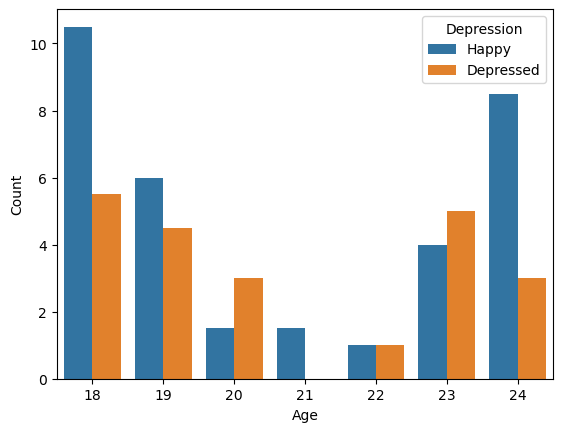

In [29]:
# Plot
# Rename column for clarity
df.rename(columns={"Gender_count": "Count", "Depression_count": "Depression"}, inplace=True)
sns.barplot(data=df, x="Age", y="Count", hue="Depression", ci=None)
plt.show()


C:\Users\Misbah\AppData\Local\Temp\ipykernel_19944\3760622461.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  g = sns.catplot(


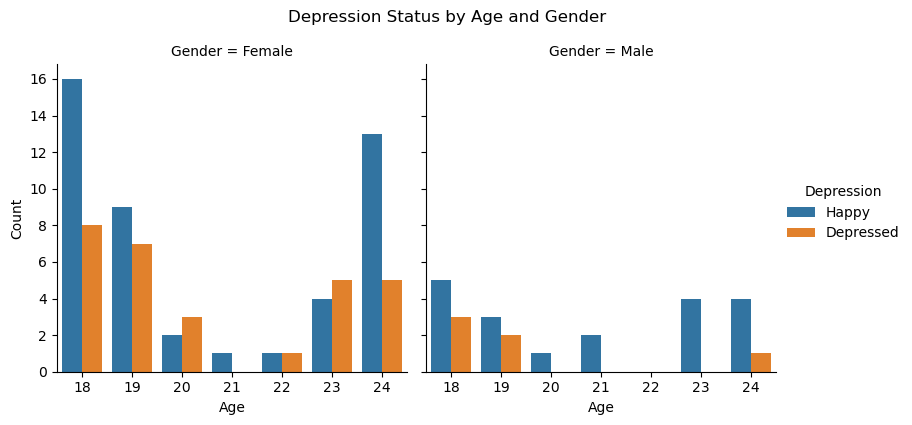

In [30]:
# Optional: split by gender using FacetGrid
g = sns.catplot(
    data=df,
    x="Age",
    y="Count",
    hue="Depression",
    col="Gender",
    kind="bar",
    ci=None,
    height=4,
    aspect=1
)
g.fig.suptitle("Depression Status by Age and Gender", y=1.05)
plt.show()

### which gender suffers more with mental health

In [33]:

query="""SELECT 
  Gender,
  SUM(CASE WHEN Depression = 'YES' THEN 1 ELSE 0 END) AS Depression_Count,
  SUM(CASE WHEN Anxiety = 'YES' THEN 1 ELSE 0 END) AS Anxiety_Count,
  SUM(CASE WHEN Panic_Attack = 'YES' THEN 1 ELSE 0 END) AS Panic_Attack_Count
FROM student_mental_health
GROUP BY Gender;"""
cursor.execute(query)
data=cursor.fetchall()
data
df=pd.DataFrame(data, columns=["Gender","Depression_count","anxiety_count","panic_attack_count"])
df




,Gender,Depression_count,anxiety_count,panic_attack_count
0,Female,29,24,25
1,Male,6,10,8


### Mental health issues by Course 

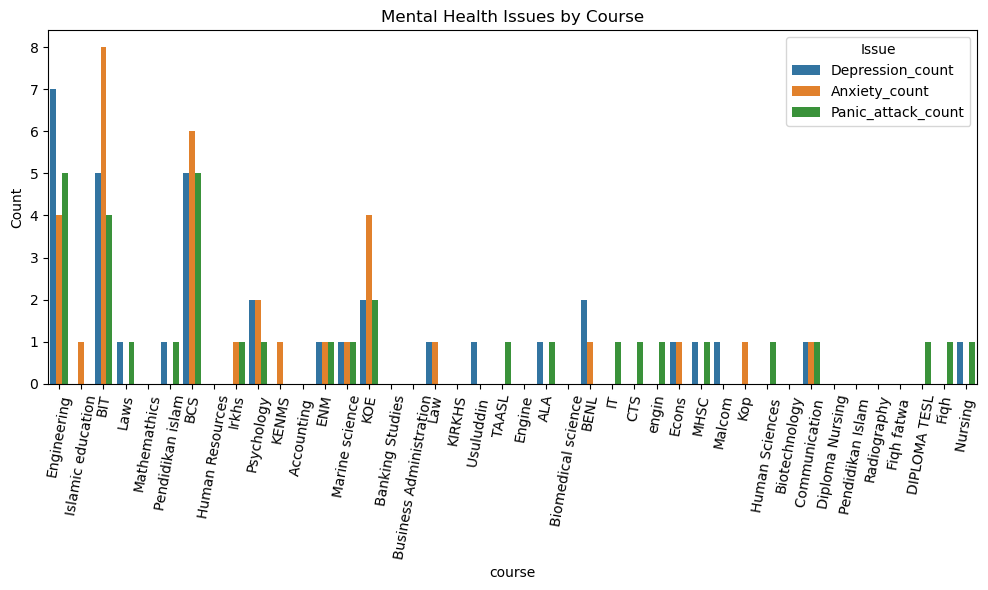

In [47]:
query="""SELECT 
  course, 
  SUM(CASE WHEN Depression = 'YES' THEN 1 ELSE 0 END) AS Depression_Count,
  SUM(CASE WHEN Anxiety = 'YES' THEN 1 ELSE 0 END) AS Anxiety_Count,
  SUM(CASE WHEN Panic_Attack = 'YES' THEN 1 ELSE 0 END) AS Panic_Attack_Count
FROM student_mental_health
GROUP BY course;"""
cursor.execute(query)
data=cursor.fetchall()
data
df=pd.DataFrame(data, columns=["course","Depression_count","Anxiety_count","Panic_attack_count"])
df

# Melt the DataFrame to long format
df_melted = df.melt(
    id_vars='course',
    value_vars=['Depression_count', 'Anxiety_count', 'Panic_attack_count'],
    var_name='Issue',
    value_name='Count'
)

# Create a grouped barplot
plt.figure(figsize=(10, 6))
sns.barplot(data=df_melted, x='course', y='Count', hue='Issue')
plt.title("Mental Health Issues by Course")
plt.xticks(rotation=80)
plt.tight_layout()
plt.show()

### Mental health by CGPA

In [59]:
query="""select CGPA, count(*) as cases
from student_mental_health
where depression= 'Yes' or panic_attack='yes' or anxiety='yes' 
group by CGPA
order by CGPA;"""
cursor.execute(query)
data=cursor.fetchall()
data
df=pd.DataFrame(data, columns=["CGPA","cases"])
df

,CGPA,cases
0,0 - 1.99,1
1,2.00 - 2.49,1
2,2.50 - 2.99,3
3,3.00 - 3.49,28
4,3.50 - 4.00,30
5,3.50 - 4.00,1


### student recieving special treatment

In [62]:
query="""select count(*) as Total_with_treatment
from student_mental_health
where (depression= 'Yes' or panic_attack='yes' or anxiety='yes') 
and special_treatment='yes';"""
cursor.execute(query)
data=cursor.fetchall()
data
df=pd.DataFrame(data, columns=["total_with_tretment"])
df

,total_with_tretment
0,6


### year wise mental health trends 

In [64]:

query="""SELECT 
  current_year,
  SUM(CASE WHEN anxiety = 'yes' THEN 1 ELSE 0 END) AS anxiety_count,
  SUM(CASE WHEN panic_attack = 'yes' THEN 1 ELSE 0 END) AS panic_attack_count,
  SUM(CASE WHEN depression = 'yes' THEN 1 ELSE 0 END) AS depression_count
FROM student_mental_health
GROUP BY current_year
ORDER BY current_year;"""
cursor.execute(query)
data=cursor.fetchall()
data
df=pd.DataFrame(data, columns=["current_year","anxiety_count","panic_attack_count","depression_count"])
df

,current_year,anxiety_count,panic_attack_count,depression_count
0,year 1,14,14,14
1,year 2,10,8,10
2,year 3,8,10,10
3,year 4,2,1,1


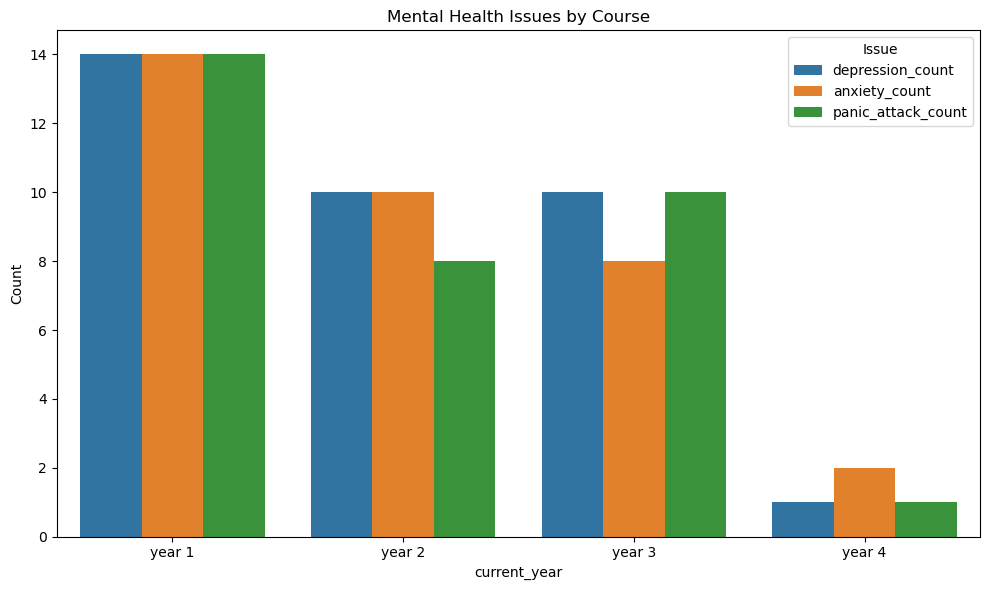

In [68]:
# Melt the DataFrame to long format
df_melted = df.melt(
    id_vars='current_year',
    value_vars=['depression_count', 'anxiety_count', 'panic_attack_count'],
    var_name='Issue',
    value_name='Count'
)

# Create a grouped barplot
plt.figure(figsize=(10, 6))
sns.barplot(data=df_melted, x='current_year', y='Count', hue='Issue')
plt.title("Mental Health Issues by Course")
plt.tight_layout()
plt.show()